In [20]:
import pandas as pd

In [2]:
DATA_FOLDER = "audio_data"

In [3]:
df = pd.read_csv("audio_metadata.csv", index_col="id")
df.head(5)

,name,category,extension,file_path
id,,,,
1,50_Minutes-Colours,alternative,mp3,alternative/50_Minutes-Colours.mp3
2,50_Minutes-Nightwalk,alternative,mp3,alternative/50_Minutes-Nightwalk.mp3
3,50_Minutes-The_Great_Wall,alternative,mp3,alternative/50_Minutes-The_Great_Wall.mp3
4,Abigail_Lapell-Dress_Rehearsal,alternative,mp3,alternative/Abigail_Lapell-Dress_Rehearsal.mp3
5,Albino_Catfish-Ice_Cream,alternative,mp3,alternative/Albino_Catfish-Ice_Cream.mp3


## Analyse single audio file

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

AUDIO_ID = 3

In [69]:
def get_audio(df, id):
    file_path = df.loc[id, 'file_path']
    audio_path = f"{DATA_FOLDER}/{file_path}"
    return ipd.Audio(filename=audio_path)

def display_audio(file):
    ipd.display(file)

### Play audio

In [70]:
audio = get_audio(df, AUDIO_ID)
display_audio(audio)

In [71]:
def load_audio(df, id):
    file_path = df.loc[id, 'file_path']
    audio_path = f"{DATA_FOLDER}/{file_path}"

    return librosa.load(audio_path)

### Basic informations about file

In [72]:
y, sr = load_audio(df, AUDIO_ID)
print(f"audio data (first 20): {y[:20]}")
print(f"audio data shape: {y.shape}")
print(f"sample rate: {sr}")

audio data (first 20): [ 3.5564881e-08 -1.5133992e-09  3.1082891e-08  4.6566129e-08
 -2.3166649e-08  2.0372681e-08  4.0396117e-08  4.4237822e-08
  4.5314664e-08  5.7043508e-08 -1.1612428e-07 -6.3242624e-08
 -3.5215635e-08 -4.1211024e-08 -2.9220246e-08  1.0698568e-07
  8.0384780e-08  5.8207661e-10  1.0011718e-08  7.2759576e-09]
audio data shape: (212280,)
sample rate: 22050


### Raw Audio

In [146]:
def plot_raw_audio(y):
    fig, ax = plt.subplots(figsize=(12, 5))
    plot = pd.Series(y).plot(
        ax=ax,
        lw=1,
        title="Raw Audio",
        color=color_pal[0]
    )
    return fig, plot

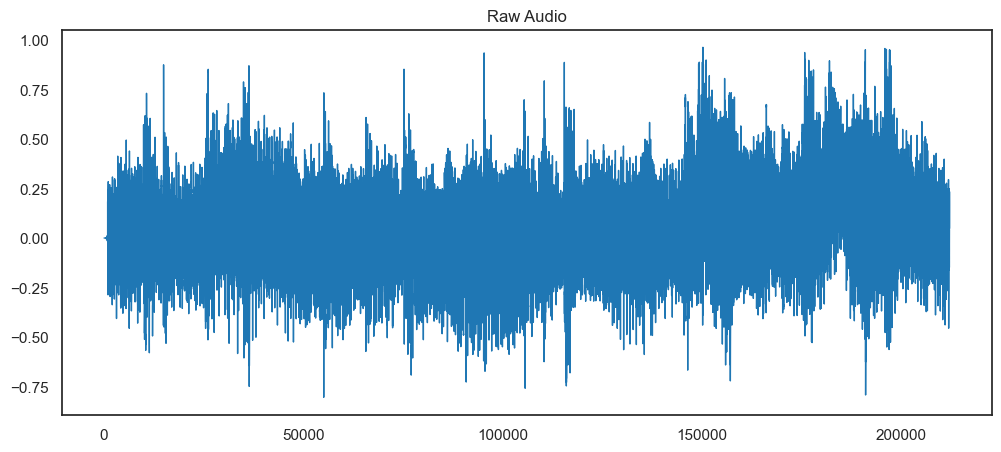

In [149]:
figure, plot = plot_raw_audio(y)
plt.show()

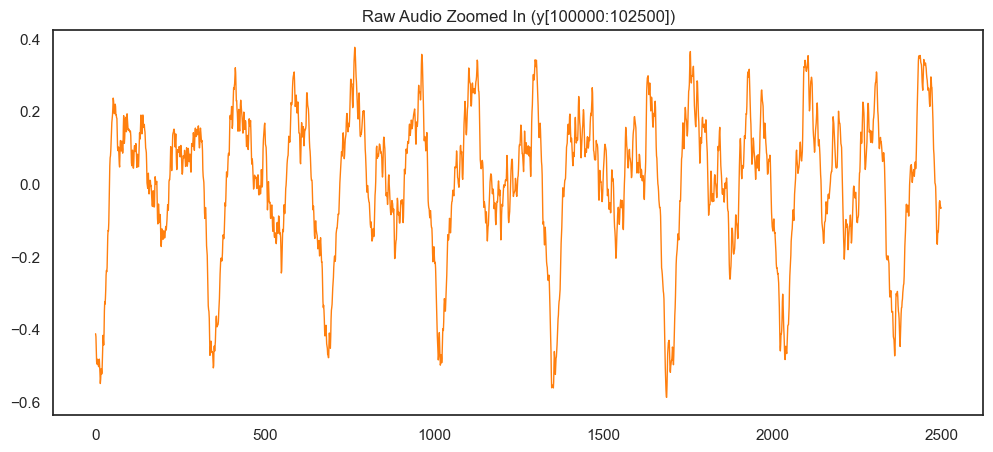

In [90]:
pd.Series(y[100000:102500]).plot(
    figsize=(12, 5),
    lw=1,
    title="Raw Audio Zoomed In (y[100000:102500])",
    color=color_pal[1]
)
plt.show()

### Basic audio data

In [74]:
# Get the duration in seconds
duration = librosa.get_duration(y=y, sr=sr)
print(f"Audio duration: {duration} seconds")

# Get the tempo (beats per minute)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print(f"Tempo: {tempo} BPM")

Audio duration: 9.627210884353742 seconds
Tempo: 129.19921875 BPM


### Amplitude

In [150]:
def plot_amplitude(y, sr):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Extract the amplitude
    magnitude_spec = librosa.amplitude_to_db(librosa.magphase(librosa.stft(y))[0])
    
    # Collapse the frequency dimension by taking the mean
    amplitude = magnitude_spec.mean(axis=0)
    
    # Calculate the time axis in seconds
    time = librosa.times_like(amplitude, sr=sr)
    
    plot = plt.plot(time, amplitude, alpha=0.8)
    plt.title('Amplitude over time')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (dB)')
    
    return fig, plot

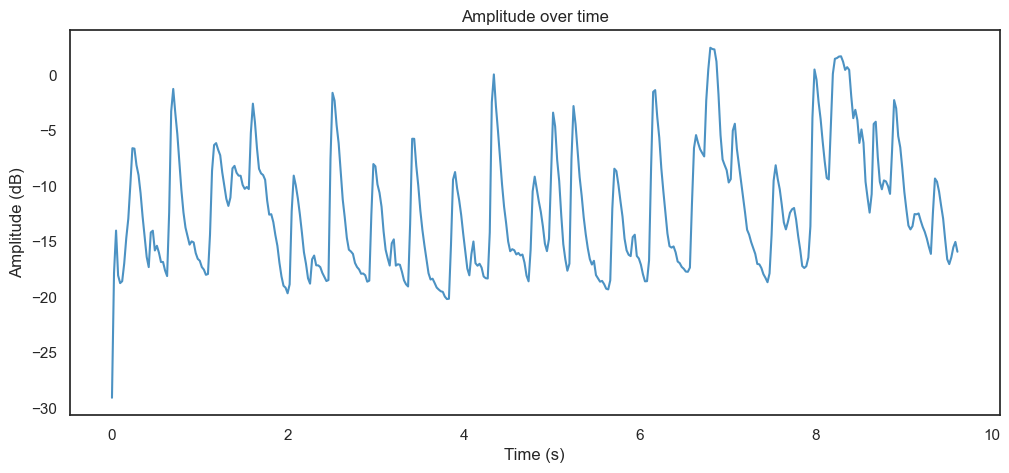

In [151]:
figure, plot = plot_amplitude(y, sr)
plt.show()

### Spectrum

In [152]:
def plot_spectrum(y, sr):
    fig, ax = plt.subplots(figsize=(12, 5))

    ft = np.abs(librosa.stft(y[:sr], hop_length=sr+1))

    plot = plt.plot(ft)
    plt.title('Spectrum');
    plt.xlabel('Frequency Bin');
    plt.ylabel('Amplitude');

    return fig, plot

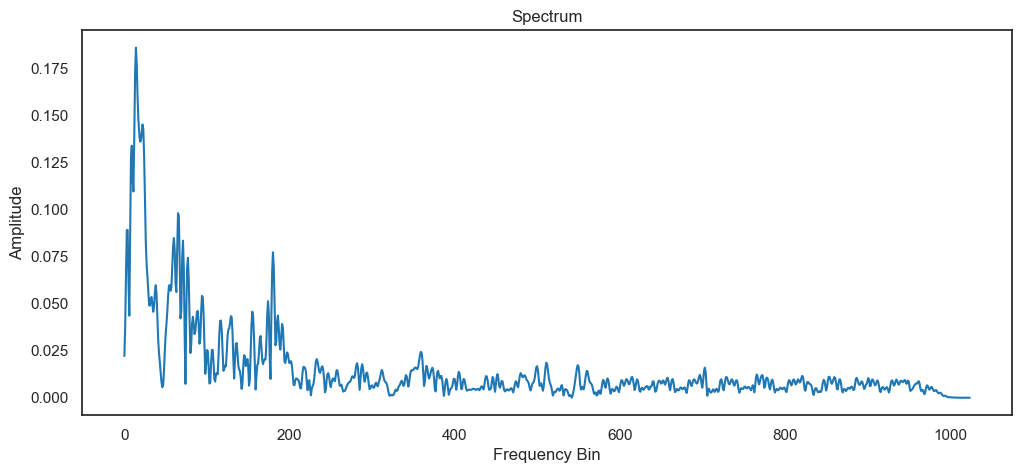

In [153]:
figure, plot = plot_spectrum(y, sr)
plt.show()

### Spectogram

In [158]:
def plot_spectogram(y):
    D = librosa.stft(y)
    dB_scaled_spectogram = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    fig, ax = plt.subplots(figsize=(12,5))
    img = librosa.display.specshow(
        dB_scaled_spectogram,
        x_axis='time',
        y_axis='log',
        ax=ax
    )
    ax.set_title('Spectogram', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')

    return fig, plot

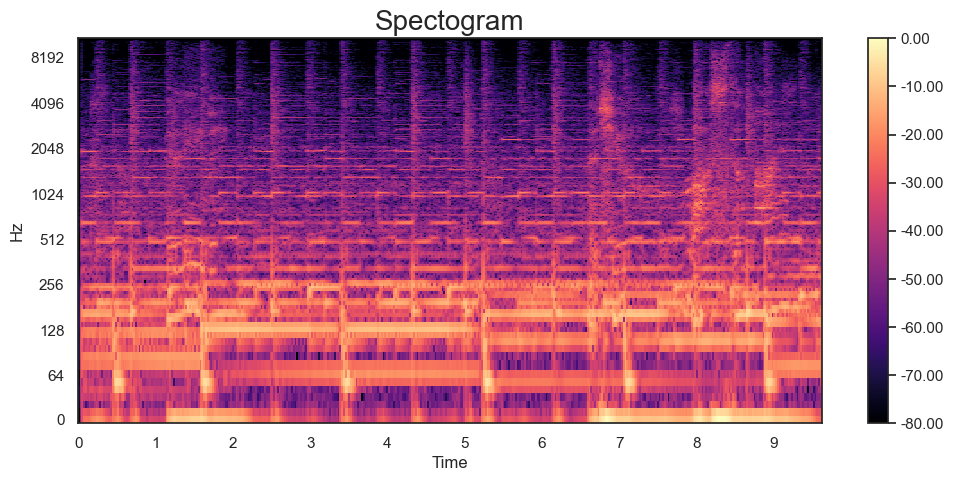

In [159]:
figure, plot = plot_spectogram(y)
plt.show()

### Mel Spectogram

In [160]:
def plot_mel_spectogram(y):
    S = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_mels=128 * 2,
    )
    dB_scaled_spectogram_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    fig, ax = plt.subplots(figsize=(12, 5))
    img = librosa.display.specshow(
        dB_scaled_spectogram_mel,
        x_axis='time',
        y_axis='log',
        ax=ax
    )
    ax.set_title('Mel Spectogram', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')

    return fig, plot

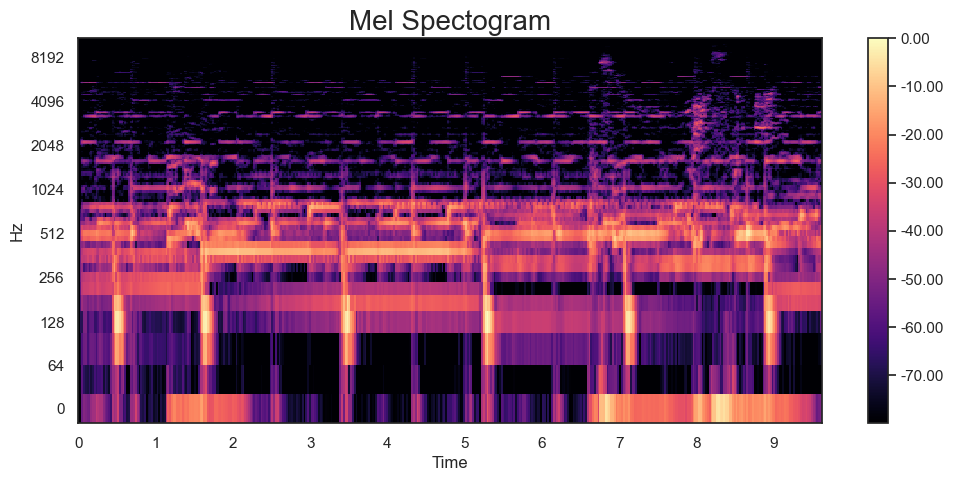

In [161]:
figure, plot = plot_mel_spectogram(y)
plt.show()

### Chroma

In [172]:
def plot_chroma(y, sr):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Get the chroma feature
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
    # Plot the chroma feature
    plot = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chromagram')

    return fig, plot

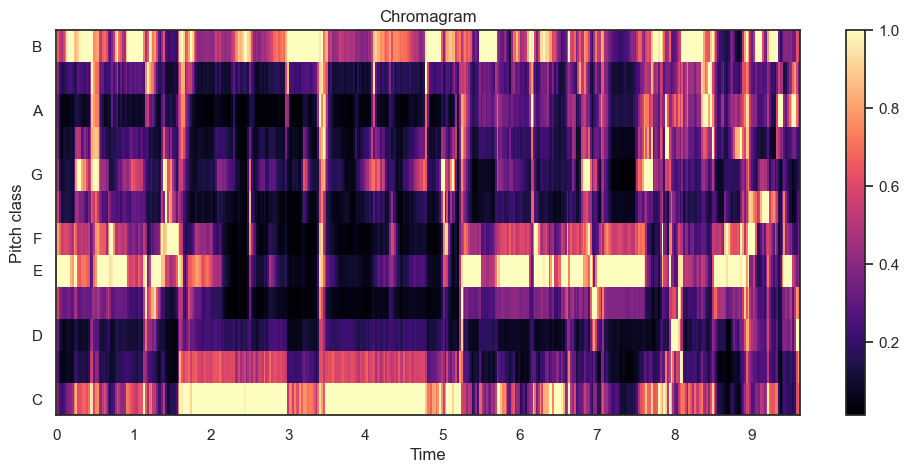

In [173]:
figure, plot = plot_chroma(y, sr)
plt.show()

### MFCCs

In [179]:
def plot_mfccs(y, sr):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Get the mel-frequency cepstral coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    
    # Plot the MFCCs
    plot = librosa.display.specshow(audio_features['mfccs'], x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.ylabel('MFCC Coefficients')

    return fig, plot

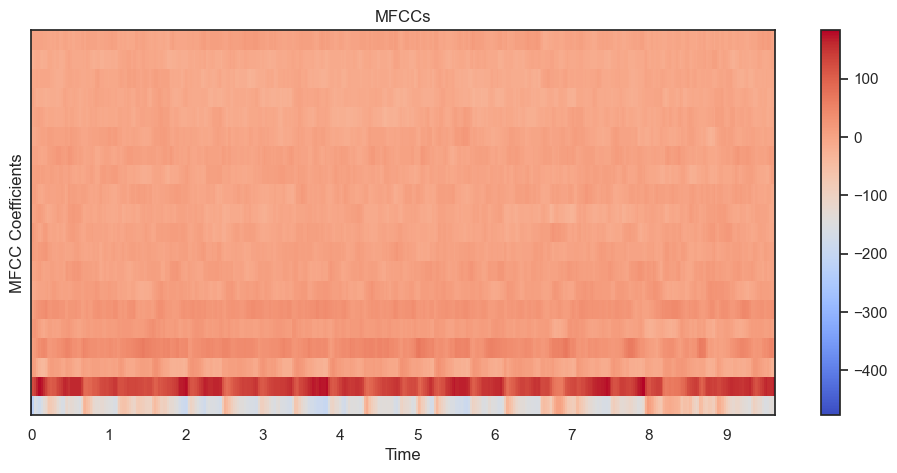

In [180]:
figure, plot = plot_mfccs(y, sr)
plt.show()

## Get data for each audio file and save it to db

### Database connection

In [182]:
import os
import psycopg2
from psycopg2 import sql

In [183]:
# DATABASE CONNECTION 
HOST = "localhost"
DATABASE = "audio"
USER = "postgres"
PASSWORD = "postgres"

In [184]:
conn = psycopg2.connect(
    host=HOST,
    database=DATABASE,
    user=USER,
    password=PASSWORD
)

cursor = conn.cursor()

### Iterate over df

In [189]:
for id in df.index:
    if id > 5:
        break
        
    print(id)
    y, sr = load_audio(df, id)
    
    duration = librosa.get_duration(y=y, sr=sr)
    # print(f"Audio duration: {duration} seconds")
    
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    # print(f"Tempo: {tempo} BPM")

    # figure, plot = plot_raw_audio(y)
    # figure, plot = plot_amplitude(y, sr)
    # figure, plot = plot_spectrum(y, sr)
    # figure, plot = plot_spectogram(y)
    # figure, plot = plot_mel_spectogram(y)
    # figure, plot = plot_mfccs(y, sr)

1
2
3
4
5


## Credits

A lot of stuff is based on: https://www.kaggle.com/code/robikscube/working-with-audio-in-python/notebook